In [1]:
import pandas as pd
import numpy as np
import pathlib
import json
import random
import re

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

RANDOM_SEED = 19439
random.seed(RANDOM_SEED)

# Table 1

방언의 음운 변화 예시 데이터로부터 탐색

In [3]:
df = pd.read_csv("../datas/output/chungcheong_dialect_data_age_sampled.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일,길이
0,영화보다는 그런 쪽으로 쫌 많이 다녀서,영화보다는 그런 쪽으로 조금 많이 다녀서,50대,DCNA20001462.json,6
1,에~ 저는 원래 고등학생 때까지,에~ 저는 원래 고등학생 때까지,20대,DCDG20000795.json,5
2,그 companyname 프로그램 이걸 많이 보거든.,그 companyname 프로그램 이걸 많이 보거든.,20대,DCDG20001601.json,6
3,고위험 그~ 군이 아니야 근데 만약에 그게 임신성 당뇨로 판정이 되면은 그 엄마는 ...,고위험 그~ 군이 아니야 근데 만약에 그게 임신성 당뇨로 판정이 되면은 그 엄마는 ...,40대,DCEX20001058.json,21
4,코로나 때문에 사람들이 많이 집에 있고 이제 이릏게 했으니까,코로나 때문에 사람들이 많이 집에 있고 이제 이렇게 했으니까,40대,DCNA20001390.json,9
...,...,...,...,...,...
520983,거기서 밥을 해면 뭐 누룽지를 해야 되네 뭐 하네 막 이러는데 밥 할 것이 없어,거기서 밥을 해면 뭐 누룽지를 해야 되네 뭐 하네 막 이러는데 밥 할 것이 없어,60대 이상,DCNA20001746.json,15
520984,그~ 욕심을 부려서 그려 욕심을 부려 갖고,그~ 욕심을 부려서 그래 욕심을 부려 갖고,60대 이상,DCNA20001459.json,7
520985,그~ 낮아졌다는 게 쫌 그렇게 어~ 한 게 아니라,그~ 낮아졌다는 게 조금 그렇게 어~ 한 게 아니라,50대,DCDG20000849.json,9
520986,사람들 퀸와사비 처음 나왔을 때도 완전 문화충격이어가지구,사람들 퀸와사비 처음 나왔을 때도 완전 문화충격이어가지구,20대,DCNA20000770.json,7


In [4]:
dia_df = df[df["표준어"] != df["방언"]]
dia_df

,방언,표준어,연령대,출처 파일,길이
0,영화보다는 그런 쪽으로 쫌 많이 다녀서,영화보다는 그런 쪽으로 조금 많이 다녀서,50대,DCNA20001462.json,6
4,코로나 때문에 사람들이 많이 집에 있고 이제 이릏게 했으니까,코로나 때문에 사람들이 많이 집에 있고 이제 이렇게 했으니까,40대,DCNA20001390.json,9
7,해 달라고 내가 해 놓구서나 그러니까 그냥 고춧가루만 갖구 쪼금 갖구 와 그러기만 ...,해 달라고 내가 해 놓구서 그러니까 그냥 고춧가루만 갖구 쪼금 갖구 와 그러기만 했거든.,60대 이상,DCNA20001744.json,14
11,대표나 회사들이 어~ 방송을 통해서 보여주고 싶은 게 뭔지를 우리가 쪼금 어~ 더 ...,대표나 회사들이 어~ 방송을 통해서 보여주고 싶은 게 뭔지를 우리가 쪼금 어~ 더 ...,30대,DCNA20000902.json,16
13,옛날 꺼 말고 최근에 나온 거 음~ 뭐지 퍼스트 클래스,옛날 거 말고 최근에 나온 거 음~ 뭐지 퍼스트 클래스,20대,DCEX20000030.json,10
...,...,...,...,...,...
520980,쫌 화를 잘 억누르질 못해 응 그게 쫌 밖에 표출이 될 정도로,조금 화를 잘 억누르질 못해 응 그게 조금 밖에 표출이 될 정도로,20대,DCDG20001304.json,12
520981,다른 방안에 대해서 조언을 해준다 그러면은 인자 인제 듣기는 하는디 그래도,다른 방안에 대해서 조언을 해준다 그러면은 이제 인제 듣기는 하는데 그래도,20대,DCEX20002100.json,11
520984,그~ 욕심을 부려서 그려 욕심을 부려 갖고,그~ 욕심을 부려서 그래 욕심을 부려 갖고,60대 이상,DCNA20001459.json,7
520985,그~ 낮아졌다는 게 쫌 그렇게 어~ 한 게 아니라,그~ 낮아졌다는 게 조금 그렇게 어~ 한 게 아니라,50대,DCDG20000849.json,9


In [6]:
cc_dia_sample = dia_df.sample(1000)

cc_dia_sample

,방언,표준어,연령대,출처 파일,길이
239729,인저 엄마가 계셨을 때는 친정에서 해주고 그래서 뭐~ 나 혼자 김치를 담아본 적이 없어.,인제 엄마가 계셨을 때는 친정에서 해주고 그래서 뭐~ 나 혼자 김치를 담아본 적이 없어.,50대,DCEX20002043.json,14
48975,쨌든 케이팝 아이돌들이 일단 영향력 있는 케이팝 아이돌들이 요즘에는 한복 같은 거 ...,어쨌든 케이팝 아이돌들이 일단 영향력 있는 케이팝 아이돌들이 요즘에는 한복 같은 거...,20대,DCEX20002364.json,20
91744,아 근데 name랑 한번 전에 한번 얘기한 적 있는데 그~ 재수를 할 거였으면 작년...,아 근데 &name30&랑 한번 전에 한번 얘기한 적 있는데 그~ 재수를 할 거였으...,20대,DCEX20001038.json,17
254966,그런 생각은 쫌 해보고 있고,그런 생각은 조금 해보고 있고,30대,DCDG20002407.json,5
453345,유럽 여행은 어트게 보면은 대 많이 피곤한 여행이잖여?,유럽 여행은 어떻게 보면은 되게 많이 피곤한 여행이잖아?,20대,DCEX20002152.json,8
...,...,...,...,...,...
322901,그까 그 별다르게 효과가 없을 거 같은 거야.,그러니까 그 별다르게 효과가 없을 거 같은 거야.,50대,DCNA20000351.json,8
128492,너무 기초는 아니고 그래도 너 엄청 기초는 그래도 쫌 알긴 알았어 왜냐면 내가 그~...,너무 기초는 아니고 그래도 너 엄청 기초는 그래도 조금 알긴 알았어 왜냐면 내가 그...,20대,DCDG20001590.json,17
406996,근데 내가 있다 가만히 이케 이렇게 보다면은,근데 내가 있다 가만히 이렇게 이렇게 보다면은,50대,DCNA20002102.json,7
411240,그때 엄청 어려-어려써서 무섭다고 비행기 가는 내내,그때 엄청 어려-어려서 무섭다고 비행기 가는 내내,10대,DCEX20002379.json,7


In [7]:
df = pd.read_csv("../datas/output/jeonla_dialect_data_age_sampled.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일,길이
0,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 할려고 생각을 ...,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 하려고 생각을 ...,20대,DJSX20002683.json,15
1,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,30대,DJDG20002125.json,8
2,쫌 보면 인제 세계 인제,조금 보면 인제 세계 인제,30대,DJSX20004304.json,5
3,가시나들 있으니까 뭐~ 일부러 뭐~ 쫌 져주는 척 또 한다고 그랬는진 모르겄는디,계집아이들 있으니까 뭐~ 일부러 뭐~ 조금 져주는 척 또 한다고 그랬는진 모르겠는데,20대,DJDG20001833.json,12
4,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,20대,DJDD20000034.json,12
...,...,...,...,...,...
508409,그~ 마음이나 생각이 조금 달라지나 봐,그~ 마음이나 생각이 조금 달라지나 봐,40대,DJSX20004708.json,6
508410,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,60대 이상,DJSX20004083.json,11
508411,방구석에 이케 이케 이불 뒤집고 이렇게 오열을 했었었는데,방구석에 이렇게 이렇게 이불 뒤집고 이렇게 오열을 했었었는데,20대,DJDG20001151.json,8
508412,뭐 없던 원래 없던 꿈도 아니라 이제 한창,뭐 없던 원래 없던 꿈도 아니라 이제 한창,20대,DJSX20000555.json,8


In [8]:
dia_df = df[df["표준어"] != df["방언"]]

dia_sample = dia_df.sample(1000)

dia_sample

,방언,표준어,연령대,출처 파일,길이
68564,쫌 쫌 가엾드라구요 그래서 일하고 애까지 보랴,조금 조금 가엾더라고요 그래서 일하고 애까지 보고,30대,DJSX20003676.json,7
386706,예지랑은 영화관 가서 영화를 보면은 항상 그런 식으로 쫌 뭔가 모자란 영화를 보게 ...,예지랑은 영화관 가서 영화를 보면은 항상 그런 식으로 좀 뭔가 모자란 영화를 보게 ...,20대,DJSX20000512.json,14
201094,가도 재밌게 난 지금 볼라고 하고 있어.,걔도 재밌게 난 지금 볼라고 하고 있어.,30대,DJDG20002480.json,7
501136,생각보다 사람들이 편의점 알바생을 쫌 막 대하는 경우가 많았던 거 같애.,생각보다 사람들이 편의점 알바생을 조금 막 대하는 경우가 많았던 거 같애.,20대,DJDG20001425.json,11
365977,첫눈이 보통 십 일 월 이 십 일경이 오더라고 그니까 작년 재작년 같은 경우만 해도...,첫눈이 보통 십 일 월 이 십 일경이 오더라고 그러니까 작년 재작년 같은 경우만 해...,50대,DJDD20001371.json,22
...,...,...,...,...,...
447631,춥다고 하는데 왜 이르케 막 더워죽겠네 이러면서 막,춥다고 하는데 왜 이렇게 막 더워죽겠네 이러면서 막,30대,DJDG20001893.json,8
44240,그래가지고 나보고 인제 내가 사슴농장 xxxx 사슴 인제 그 녹용 같은거,그래서 나보고 인제 내가 사슴농장 xxxx 사슴 인제 그 녹용 같은거,30대,DJSX20003568.json,11
124799,나는 그 그 꼬마는 조금 버르쟁이가 없어서 싫더구만.,나는 그 그 꼬마는 조금 버르장머리가 없어서 싫더구만.,50대,DJSX20001937.json,8
18228,이런걸 쫌 알아야지 뭐~ 할 수 있을 것 같애서,이런걸 조금 알아야지 뭐~ 할 수 있을 것 같애서,50대,DJSX20003464.json,9


In [9]:
df = pd.read_csv("../datas/output/jeju_dialect_data_age_sampled.csv", index_col=0)

dia_df = df[df["표준어"] != df["방언"]]

dia_sample = dia_df.sample(1000)

dia_sample

,방언,표준어,연령대,출처 파일,길이
1962031,그냥 여기를 계속 다녔어야 했나 이쪽에 재능인거 닮은디,그냥 여기를 계속 다녔어야 했나 이쪽에 재능인거 같은데,20대,DZJD20000172.json,8
727548,그 빵 빵에다 딸기쨈이랑 뭐 발라져 있언?,그 빵 빵에다 딸기쨈이랑 뭐 발라져 있었어?,20대,DZHF20000240.json,7
34857,지 이거 이거 어제가 아니 이것도 많이 나안 지금,지 이거 이거 어제가 아니야 이것도 많이 나았어 지금,20대,DZES20000100.json,9
2040367,겅한디 둘 다 별론 거 닮아 나는,그런데 둘 다 별론 거 같아 나는,20대,DZJD20000388.json,7
1699014,어. 그러면 마르지도 않고 그러면 이,어. 그러면 마르지도 않고 그러면 #이,40대,DZHF20002654.json,6
...,...,...,...,...,...
1893428,게믄 이제 두개가 세트니까 두 개 사주믄 이백 넘주마씀.,그러면 이제 두개가 세트니까 두 개 사주면 이백 넘지요.,40대,DZHF20003016.json,9
1376933,어 거기서 포장되오더라 깜짝 놀란,어 거기서 포장되오더라 깜짝 놀랐어,20대,DZHF20002010.json,5
71614,너 지금도 천식 그거 이서?,너 지금도 천식 그거 있어?,40대,DZES20000186.json,5
551613,name도 근데 또 name는 이제야 이제야 막 초년 초년 막 설레는 마음으로 시...,name도 근데 또 name는 이제야 이제야 막 초년 초년 막 설레는 마음으로 시...,30대,DZES21001648.json,20


In [10]:
df = pd.read_csv("../datas/output/gangwon_dialect_data_age_sampled.csv", index_col=0)

dia_df = df[df["표준어"] != df["방언"]]

dia_sample = dia_df.sample(1000)

dia_sample

,방언,표준어,연령대,출처 파일,길이
181204,하마 첫눈이라니 아름다운 겨울이 왔네요.,벌써 첫눈이라니 아름다운 겨울이 왔네요.,20대,DGDQ20005020.json,5
1072992,인재 다음에 뭘 하는 거예요?,이제 다음에 뭘 하는 거예요?,50대,DGTS20000019.json,5
1074866,삶을 되돌아 보셨을 때 언재 가장 행복하셨어요?,삶을 되돌아 보셨을 때 언제 가장 행복하셨어요?,40대,DGTS20000023.json,7
1415051,당신이 수상한 근 당연한 일 아닌가요?,당신이 수상한 것은 당연한 일 아닌가요?,40대,DGTS20000674.json,6
1528009,우딴 경우든 레바논에서의 실제 교전은 진짜 레바논 사람과 하는 것이 결코 아니었어.,어떤 경우든 레바논에서의 실제 교전은 진짜 레바논 사람과 하는 것이 결코 아니었어.,30대,DGTS20001092.json,12
...,...,...,...,...,...
1520534,내 앞에선 그닷하게 불편스레 굴지마.,내 앞에선 그렇게 불편스레 굴지마.,40대,DGTS20001064.json,5
917989,name의 고등핵교 시절을 조사해 보면 뭔가 단서가 잡힐 것 같다고 말씸하셨어요.,name의 고등학교 시절을 조사해 보면 뭔가 단서가 잡힐 것 같다고 말씀하셨어요.,30대,DGIN21711108.json,11
1198721,저래 어린아이에게 일을 시키다니 부당한 거 같아.,저렇게 어린아이에게 일을 시키다니 부당한 거 같아.,30대,DGTS20000251.json,7
1396948,시실거리지 마고 좀 진지하게 얘기해 봐라.,시실거리지 말고 좀 진지하게 얘기해 봐라.,50대,DGTS20000626.json,6


In [12]:
df = pd.read_csv("../datas/output/gyeongsang_dialect_data_age_sampled.csv", index_col=0)

dia_df = df[df["표준어"] != df["방언"]]

dia_sample = dia_df.sample(500)

dia_sample

,방언,표준어,연령대,출처 파일,길이
243554,그나마 원산지 표시해주 해놓는 식당은 쫌 낫지.,그나마 원산지 표시해주 해놓는 식당은 조금 낫지.,50대,DKCI20002293.json,7
520496,교우님은 냉담 교우라 카대 교우 그게 뭡니까 하니까,교우님은 냉담 교우라 하대 교우 그게 뭡니까 하니까,20대,DKSR20004339.json,8
385432,좀 귀찮긴 하지만 오히려 쫌 더 도움이 되는 거 같고,좀 귀찮긴 하지만 오히려 조금 더 도움이 되는 거 같고,20대,DKSR20005589.json,10
119541,연애만 하고 있는 건데 이케 동거를 하는 하고 있는 경우가 되게 많던데,연애만 하고 있는 건데 이렇게 동거를 하는 하고 있는 경우가 되게 많던데,30대,DKSR20006862.json,12
297284,학교 다니고 그러면은 시험 기간에도 시간 내기가 쫌 힘들고,학교 다니고 그러면은 시험 기간에도 시간 내기가 조금 힘들고,30대,DKSR20002023.json,9
...,...,...,...,...,...
217215,그~ 뭐라 해야 되노 구름 위에 떠갖고 사람이 그냥 둥둥둥둥,그~ 뭐라 해야 되지 구름 위에 떠갖고 사람이 그냥 둥둥둥둥,50대,DKSR20003516.json,10
572184,그래서 어릴 때는 약간 색깔도 쫌 특이한 색깔로 이루어진 옷들 많이 샀거든.,그래서 어릴 때는 약간 색깔도 조금 특이한 색깔로 이루어진 옷들 많이 샀거든.,30대,DKCI20000647.json,12
545486,어 저 삼 개월 정도 남았을걸요 아 그면 칠 개월,어 저 삼 개월 정도 남았을걸요 아 그러면 칠 개월,10대,DKCI20000112.json,10
211937,그르케 응 엉겅퀴도 좋다 그러고,그렇게 응 엉겅퀴도 좋다 그러고,50대,DKSR20007131.json,5


충청도: (그까, 그러니까), (인저, 인제), (어트케, 어떻게)

전라도: (쫌, 조금), (가, 걔), (이르케, 이렇게), (버르쟁이, 버르장머리)

제주도: (있언?, 있었어?), (같아, 닮아), (허다그네, 하다가)

강원도: (하마, 벌써), (고등핵교, 고등학교), (그닷하게, 그렇게)

경상도: (카면서, 하면서), (안 같다 아이가, 안 같지 않냐), (뭐라 해야 되지, 뭐라 해야 카노)

# Table 2

In [15]:
df = pd.read_csv("../datas/output/gangwon_dialect_data_bpe.csv", index_col=0)

In [16]:
morph_df.sample(10, random_state=10)

,방언,표준어,연령대,출처 파일,길이
1564834,폐활량 ##이 적 ##은 것 ##이 담배 ##를 자주 페와 그런 것 아니 ##냐 ##?,폐활량 ##이 적 ##은 것 ##이 담배 ##를 자주 펴 그런 것 아니 ##냐 ##?,50대,DGTS20002134.json,9
1060250,우리 언나 ##도 그렇 ##게 씩 ##씩 ##하 ##게 발길 ##질 ##하 ##는 건지,우리 아이 ##도 그렇 ##게 씩 ##씩 ##하 ##게 발길 ##질 ##하 ##는 건지,50대,DGIN21920673.json,6
456441,딱 한 ##사 ##램 빼 ##고 안 알켜 ##줘 ##.,딱 한 ##사람 빼 ##고 안 알려 ##줘 ##.,60대 이상,DGIN20710999.json,5
589125,데 그때 나 ##는 그래서 name ##이 ##가 막 새벽 세 ##네 시 ##까지 ...,데 그때 나 ##는 그래서 name ##이 ##가 막 새벽 세 ##네 시 ##까지 ...,20대,DGIN21500447.json,16
1341599,와 뭔지 모르 ##지만 눈 ##은 장창 나 ##를 즐겁 ##게 해 ##.,와 뭔지 모르 ##지만 눈 ##은 항상 나 ##를 즐겁 ##게 해 ##.,30대,DGTS20000505.json,8
443996,그 시간 ##에 책 ##두 읽 ##구 할로 스케줄 ##두 짜 ##구요 ##.,그 시간 ##에 책 ##두 읽 ##구 하루 스케줄 ##두 짜 ##구요 ##.,50대,DGIN20710953.json,7
865616,고마워 인제 나 다 나았 ##으이까 하 ##지 ##마 ##.,고마워 인제 나 다 나았 ##으니까 하 ##지 ##마 ##.,50대,DGIN21710750.json,6
81564,이렇게 해 줄 ##수 있 ##는 직업 ##군 ##이 뭐 ##가 있 ##을까 생각 #...,이렇게 해 줄 ##수 있 ##는 직업 ##군 ##이 뭐 ##가 있 ##을까 생각 #...,10대,DGDQ20001260.json,9
257028,아니 name 씨 ##가 해 ##주 ##는 걸 우리 가족 ##이 너무 당연 ##하 ...,아니 name 씨 ##가 해 ##주 ##는 걸 우리 가족 ##이 너무 당연 ##하 ...,60대 이상,DGIN20710099.json,12
177945,그 ##들 주식 ##에 지급 ##되 ##는 프리미엄 ##이 줄어드 ##는 가운 ##...,그 ##들 주식 ##에 지급 ##되 ##는 프리미엄 ##이 줄어드 ##는 가운데 매...,50대,DGDQ20005011.json,8


In [17]:
sp_df = pd.read_csv("../datas/output/gangwon_dialect_data_SentencePiece.csv", index_col=0)

In [18]:
sp_df.loc[1060250]

방언       ▁우리 ▁언나 도 ▁그렇게 ▁씩씩하 게 ▁발길 질 하는 ▁건지
표준어      ▁우리 ▁아이 도 ▁그렇게 ▁씩씩하 게 ▁발길 질 하는 ▁건지
연령대                                     50대
출처 파일                     DGIN21920673.json
길이                                        6
Name: 1060250, dtype: object

In [20]:
df = pd.read_csv("../datas/output/gangwon_dialect_data_jamo.csv", index_col=0)
df.loc[1060250, "방언"]

'ㅇ ㅜ <SEP> ㄹ ㅣ <SEP> <SPC> ㅇ ㅓ ㄴ <SEP> ㄴ ㅏ <SEP> ㄷ ㅗ <SEP> <SPC> ㄱ ㅡ <SEP> ㄹ ㅓ ㅎ <SEP> ㄱ ㅔ <SEP> <SPC> ㅆ ㅣ ㄱ <SEP> ㅆ ㅣ ㄱ <SEP> ㅎ ㅏ <SEP> ㄱ ㅔ <SEP> <SPC> ㅂ ㅏ ㄹ <SEP> ㄱ ㅣ ㄹ <SEP> ㅈ ㅣ ㄹ <SEP> ㅎ ㅏ <SEP> ㄴ ㅡ ㄴ <SEP> <SPC> ㄱ ㅓ ㄴ <SEP> ㅈ ㅣ <SEP>'

In [23]:
df = pd.read_csv("../datas/output/gangwon_dialect_data_bpe.csv", index_col=0)

In [24]:
df.loc[1060250, "방언"]

'ìļ°ë¦¬ Ġìĸ¸ ëĤĺëıĦ Ġê·¸ëłĩê²Į ĠìĶ©ìĶ©íķĺê²Į Ġë°ľ ê¸¸ ì§ĪíķĺëĬĶ Ġê±´ì§Ģ'

# Table 3

데이터 통계치
* 토큰 길이 평균
* 훈련 셋 수
* 검증 셋 수
* 테스트셋 수

## 강원도

In [25]:
gw_df = pd.read_csv("../datas/output/gangwon_dialect_형태소_integration.csv", index_col=0)

In [27]:
print(len(gw_df[gw_df["셋"] == "train"]))
print(len(gw_df[gw_df["셋"] == "val"]))
print(len(gw_df[gw_df["셋"] == "test"]))

841540
91346
91345


In [30]:
gw_train = gw_df[gw_df["셋"] == "train"]

In [31]:
len_list = [len(tokens.split()) for tokens in gw_train["방언"]]

In [32]:
np.mean(len_list)

13.839567934976353

In [4]:
gw_df = pd.read_csv("../datas/output/gangwon_dialect_bpe_integration.csv", index_col=0)

In [5]:
gw_train = gw_df[gw_df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in gw_train["방언"]]
print(np.mean(len_list))

10.526481213014236


In [6]:
gw_df = pd.read_csv("../datas/output/gangwon_dialect_jamo_integration.csv", index_col=0)

In [7]:
gw_train = gw_df[gw_df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in gw_train["방언"]]
print(np.mean(len_list))

72.61130308719729


In [8]:
gw_df = pd.read_csv("../datas/output/gangwon_dialect_SentencePiece_integration.csv", index_col=0)

In [9]:
gw_train = gw_df[gw_df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in gw_train["방언"]]
print(np.mean(len_list))

10.591453763338642


## 경상도

In [10]:
df = pd.read_csv("../datas/output/gyeongsang_dialect_형태소_integration.csv", index_col=0)

In [11]:
print(len(df[df["셋"] == "train"]))
print(len(df[df["셋"] == "val"]))
print(len(df[df["셋"] == "test"]))

610790
89512
89511


In [12]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

16.654591594492377


In [13]:
df = pd.read_csv("../datas/output/gyeongsang_dialect_bpe_integration.csv", index_col=0)

In [14]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

12.270610193356145


In [15]:
df = pd.read_csv("../datas/output/gyeongsang_dialect_SentencePiece_integration.csv", index_col=0)

In [16]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

12.139142749553857


In [17]:
df = pd.read_csv("../datas/output/gyeongsang_dialect_jamo_integration.csv", index_col=0)

In [18]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

91.2823785589155


## 전라도

In [19]:
df = pd.read_csv("../datas/output/jeonla_dialect_jamo_integration.csv", index_col=0)

In [20]:
print(len(df[df["셋"] == "train"]))
print(len(df[df["셋"] == "val"]))
print(len(df[df["셋"] == "test"]))

508414
110458
110459


In [21]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

89.41467780194881


In [22]:
df = pd.read_csv("../datas/output/jeonla_dialect_형태소_integration.csv", index_col=0)

In [23]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

16.222936425826198


In [24]:
df = pd.read_csv("../datas/output/jeonla_dialect_bpe_integration.csv", index_col=0)

In [25]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

12.215664792865656


In [26]:
df = pd.read_csv("../datas/output/jeonla_dialect_SentencePiece_integration.csv", index_col=0)

In [27]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

11.917547510493417


## 제주도

In [28]:
df = pd.read_csv("../datas/output/jeju_dialect_형태소_integration.csv", index_col=0)

In [29]:
print(len(df[df["셋"] == "train"]))
print(len(df[df["셋"] == "val"]))
print(len(df[df["셋"] == "test"]))

1375435
80062
80061


In [30]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

13.564594473748306


In [31]:
df = pd.read_csv("../datas/output/jeju_dialect_bpe_integration.csv", index_col=0)

In [32]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

10.522351110739512


In [33]:
df = pd.read_csv("../datas/output/jeju_dialect_SentencePiece_integration.csv", index_col=0)

In [34]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

10.40019283808654


In [35]:
df = pd.read_csv("../datas/output/jeju_dialect_jamo_integration.csv", index_col=0)

In [36]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

72.94562592925148


## 충청도

In [37]:
df = pd.read_csv("../datas/output/chungcheong_dialect_형태소_integration.csv", index_col=0)

In [38]:
print(len(df[df["셋"] == "train"]))
print(len(df[df["셋"] == "val"]))
print(len(df[df["셋"] == "test"]))

520988
95000
95001


In [39]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

17.711062442896957


In [40]:
df = pd.read_csv("../datas/output/chungcheong_dialect_bpe_integration.csv", index_col=0)

In [41]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

13.053795864779994


In [42]:
df = pd.read_csv("../datas/output/chungcheong_dialect_SentencePiece_integration.csv", index_col=0)

In [43]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

12.948123393612263


In [44]:
df = pd.read_csv("../datas/output/chungcheong_dialect_jamo_integration.csv", index_col=0)

In [45]:
df_train = df[df["셋"] == "train"]
len_list = [len(tokens.split()) for tokens in df_train["방언"]]
print(np.mean(len_list))

97.69692776033229


# Table 4

## 전라 방언

In [19]:
from metric import compute_bleu_score

def calculate_dialect_bleu(지역, 토큰화):
    prediction_list = []
    try:
        fp = open("../model_storage/stan-{0}_{1}/prediction.json".format(지역, 토큰화), mode="r+", encoding="utf-16")
        prediction_list = json.loads(fp.read())
    except:
        fp = open("../model_storage/stan-{0}_{1}/prediction.json".format(지역, 토큰화), mode="r+", encoding="utf-8")
        prediction_list = json.loads(fp.read())
    
    df = pd.DataFrame(prediction_list)
    
    dialect_df = df.loc[df["truth"] != df["source"]]

    bleu = compute_bleu_score(dialect_df["pred"].to_list(), dialect_df["truth"].to_list())
    
    return bleu
    

ModuleNotFoundError: No module named 'nltk'

In [18]:
지역_리스트 = ["JL", "JJ", "GW", "GS", "CC"]
토큰_리스트 = ["형태소", "SP", "jamo", "bpe"]

for 지역 in 지역_리스트:
    for 토큰 in 토큰_리스트:
        bleu = calculate_dialect_bleu(지역, 토큰)
        print(지역, 토큰, bleu)

JL 형태소 0.890884658811528
JL SP 0.9139858304823971
JL jamo 0.9199411388437764
JL bpe 0.9065752313976188
JJ 형태소 0.7937756814865256
JJ SP 0.8241156902925804
JJ jamo 0.832047905429685
JJ bpe 0.8149642197576351
GW 형태소 0.8788176958157184
GW SP 0.8846204889134441
GW jamo 0.904351870652942
GW bpe 0.8657755218529724
GS 형태소 0.9499541038550523
GS SP 0.9546983983435469
GS jamo 0.9614173556161986
GS bpe 0.9506679951119827
CC 형태소 0.9191695824118865
CC SP 0.9235836821333573
CC jamo 0.9346367290136787
CC bpe 0.9236986994222426


# Figure 1

In [19]:
train_jj_jamo = []
train_jj_bpe = []
train_jj_sp = []

with open("../model_storage/stan-JJ_jamo/logs/train_at_2024-04-13_08_26.json", mode="r+", encoding="utf-8") as fp:
    train_jj_jamo = json.loads(fp.read())
with open("../model_storage/stan-JJ_bpe/logs/train_at_2024-04-15_02_13.json", mode="r+", encoding="utf-8") as fp:
    train_jj_bpe = json.loads(fp.read())
with open("../model_storage/stan-JJ_SP/logs/train_at_2024-04-12_08_23.json", mode="r+", encoding="utf-8") as fp:
    train_jj_sp = json.loads(fp.read())

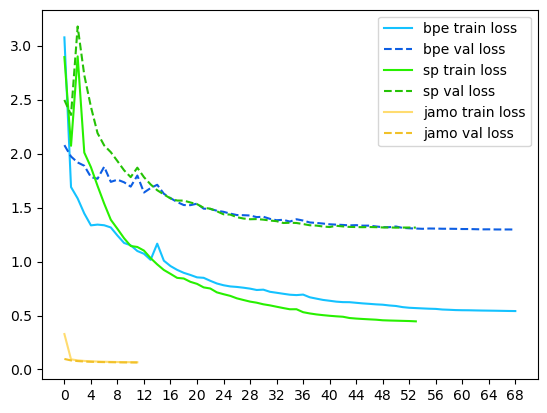

In [38]:
fig, (ax1) = plt.subplots(1, 1)

x = range(max(len(train_jj_bpe["train_loss"]), len(train_jj_jamo["train_loss"])))

ax1.plot(train_jj_bpe["train_loss"], label="bpe train loss", color='#14C2FF')
ax1.plot(train_jj_bpe["val_loss"], label="bpe val loss", linestyle='dashed', color='#0D5EE3')

ax1.plot(train_jj_sp["train_loss"], label="sp train loss", color='#28F000')
ax1.plot(train_jj_sp["val_loss"], label="sp val loss", linestyle='dashed', color='#25C205')

ax1.plot(train_jj_jamo["train_loss"], label="jamo train loss", color='#FFDC70')
ax1.plot(train_jj_jamo["val_loss"], label="jamo val loss", linestyle='dashed', color='#F1C129')

#ax1.set_xlim((-0.5, 60))
#ax1.set_ylim((-0.5, 2))

ax1.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax1.legend()
plt.savefig('figure1.png', dpi=300)

# 질적 평가

## 충청 방언

In [8]:
jamo_df = pd.read_json("../model_storage/stan-CC_jamo/prediction.json", encoding="utf-16")
bpe_df = pd.read_json("../model_storage/stan-CC_bpe/prediction.json", encoding="utf-16")
jamo_df

,source,truth,pred
0,그냥 봄에는 뭐~ 날씨 좋고 이러다 보니까 뭐~ 어디 같이 한 번 놀러 가요 이런 ...,그냥 봄에는 뭐~ 날씨 좋고 이러다 보니까 뭐~ 어디 같이 한 번 놀러 가요 이런 ...,그냥 봄에는 뭐~ 날씨 좋고 이러다 보니까 뭐~ 어디 같이 한 번 놀러 가요 이런 ...
1,요번에 아빠가 그때 갈 때 그랬다고 하드라고 아빠가 자기들끼리만 간다고 그래서 아니...,요번에 아빠가 그때 갈 때 그랬다고 하드라고 아빠가 지들끼리만 간다고 그래서 아니 ...,요번에 아빠가 그때 갈 때 그랬다고 하드라고 아빠가 지들끼리만 간다고 그래서 아니 ...
2,날짜도 뭐~ 엄마 아빠도 맘대로 잡으라고 하고 아버님 상관없다 우리 맘대로 잡자 해...,날짜도 뭐~ 엄마 아빠도 맘대로 잡으라고 하고 아버님 상관없다 우리 맘대로 잡자 해...,날짜도 뭐~ 엄마 아빠도 맘대로 잡으라고 하고 아버님 상관없다 우리 맘대로 잡자 해...
3,싫다고 하는 사람들도 있겠지만 저는 오히려 남들도 많이 갔다 와서 그만큼 증명된 좋...,싫다고 하는 사람들도 있겠지만 저는 오히려 남들도 많이 갔다 와서 그만큼 증명된 좋...,싫다고 하는 사람들도 있겠지만 저는 오히려 남들도 많이 갔다 와서 그만큼 증명된 좋...
4,내가 막 계속 막 쇼핑몰에서 이제 눈으로 눈으로만 보고 사니까 아무리 신중히 생각을...,내가 막 꼐속 막 쇼핑몰에서 이제 눈으로 눈으로만 보고 사니까 아무리 신중히 생각을...,내가 막 계속 막 쇼핑몰에서 이제 눈으로 눈으로만 보고 사니까 아무리 신중히 생각을...
...,...,...,...
94971,또 피구 이 그 그 몇 번 걸려서,또 피구 이 그 그 몇 번 걸려서,또 피구 이 그 그 몇 번 걸려서
94972,그~ 엄마는 그 딸이 한국인,그~ 엄마는 그 딸이 한국인,그~ 엄마는 그 딸이 한국인
94973,그런 걸 조금 읽고 있어요.,그런 걸 쫌 읽고 있어요.,그런 걸 쫌 읽고 있어요.
94974,그리고 말 잘 통해야 돼.,그리고 말 잘 통해야 돼.,그리고 말 잘 통해야 돼.


In [9]:
jamo_df = jamo_df[jamo_df["source"] != jamo_df["truth"]]
bpe_df = bpe_df[bpe_df["source"] != bpe_df["truth"]]

In [3]:
def get_common_prediction(pred_df1, pred_df2):
    integrated_df = None

    for idx in pred_df1.index:
        pred_row1 = pred_df1.loc[idx]
        pred2_search = pred_df2[pred_df2["source"] == pred_row1["source"]]
        if len(pred2_search) > 0:
            row_dict = {
                "source": pred_row1["source"],
                "truth": pred_row1["truth"],
                "pred1": pred_row1["pred"],
                "pred2": pred2_search.iloc[0]["pred"]
            }
            if integrated_df is None:
                integrated_df = pd.DataFrame(row_dict, index=[0])
            else:
                integrated_df = pd.concat([integrated_df, pd.DataFrame(row_dict, index=[0])], ignore_index=True)

    return integrated_df

In [17]:
cc_jamo_bpe = get_common_prediction(jamo_df, bpe_df)

cc_jamo_bpe

,source,truth,pred1,pred2
0,그럼 크리스마스 때도 있지 그~ 무슨 데이 라는 것도 있어 그러니까 이렇게 따지게 ...,그럼 크리스마스 때도 있지 그~ 무슨 데이 라는 것도 있어 그까 이렇게 따지게 되면...,그럼 크리스마스 때도 있지 그~ 무슨 데이 라는 것도 있어 그니까 이렇게 따지게 되...,그럼 크리스마스 때도 있지 그~ 무슨 데이 라는 것도 있어 그니까 이렇게 따지게 되...
1,쪼금 있다가 이제 companyname에서 먹었지 근데 우리 애는 초밥 이런 거를 ...,쪼금 있다가 이제 companyname에서 먹었지 근데 우리 애는 초밥 이런 거를 ...,쪼금 있다가 이제 companyname에서 먹었지 근데 우리 애는 초밥 이런 거를 ...,쪼금 있다가 이제 companyname에서 먹었지 근데 우리 애는 초밥 이런 거를 ...
2,그게 조금 걱정인데 그래도 친구가 운동을 하겠다는 마음을 가진 게 난 너무 기뻐 친구로서,그게 쫌 걱정인데 그래도 친구가 운동을 하겠다는 마음을 가진 게 난 너무 기뻐 친구로서,그게 쫌 걱정인데 그래도 친구가 운동을 하겠다는 마음을 가진 게 난 너무 기뻐 친구로서,그게 쫌 걱정인데 그래도 친구가 운동을 하겠다는 마음을 가진 게 난 너무 기뻐 친구로서
3,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 조금 일케 점차 조금씩 조금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 쪼금씩 쪼금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 조금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 조금씩 조금씩
4,왜냐면 그~ 이사장 그~ 여자애가 이사장 되고 싶어 했는데 아빠가 이사장 자리를 안...,왜냐면 그~ 이사장 그~ 여자애가 이사장 되고 싶어 했는데 아빠가 이사장 자리를 안...,왜냐면 그~ 이사장 그~ 여자애가 이사장 되고 싶어 했는데 아빠가 이사장 자리를 안...,왜냐면 그~ 이사장 그~ 여자애가 이사장 되고 싶어 했는데 아빠가 이사장 자리를 안...
...,...,...,...,...
5651,저는 그거에 비해서 조금 많이 다닌 편은 아닌데,저는 그거에 비해서 쫌 많이 다닌 편은 아닌데,저는 그거에 비해서 쫌 많이 다닌 편은 아닌데,저는 그거에 비해서 쫌 많이 다닌 편은 아닌데
5652,그래두 이제 다음에 다음에 인자 에~,그래두 인자 다음에 다음에 인자 에~,그래두 이제 다음에 다음에 인자 에~,그래두 이제 다음에 다음에 인자 에~
5653,아무튼 좀 맛집이라 해서 가서,아무튼 쫌 맛집이라 해서 가서,아무튼 좀 맛집이라 해서 가서,아무튼 쫌 맛집이라 해서 가서
5654,불러 관심 없어 다 뒈져야 돼.,불러 관심 없어 다 뒤져야 돼.,불러 관심 없어 다 대져야 돼.,불러 관심 없어 다 가지가�져야 돼.


In [18]:
cc_jamo_bpe = cc_jamo_bpe[cc_jamo_bpe["pred1"] != cc_jamo_bpe["pred2"]]
cc_jamo_bpe

,source,truth,pred1,pred2
3,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 조금 일케 점차 조금씩 조금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 쪼금씩 쪼금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 조금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 조금씩 조금씩
6,그러니까 그렇게 되더라고 그래서 나는 인제 애들을 그냥 믿고 그냥 나도 응,그러니까 그렇게 되드라고 그래서 나는 인제 애들을 그냥 믿고 그냥 나도 응,그러니까 그렇게 되더라고 그래서 나는 인제 애들을 그냥 믿고 그냥 나도 응,그니까 그렇게 되드라고 그래서 나는 인제 애들을 그냥 믿고 그냥 나도 응
7,좀 시인선한 애들 신선한 애들이 조금 많이 나왔더라고 그래 가지고,좀 시인선한 애들 신선한 애들이 쫌 많이 나왔더라고 그래 가주구,쫌 시인선한 애들 신선한 애들이 쫌 많이 나왔드라고 그래 가지고,쫌 시인선한 애들 신선한 애들이 쫌 많이 나왔더라고 그래 가지고
10,엄마가 좋아하는 게 이런 거구나 그러더라구 그래서 어쨌든 나는,엄마가 좋아하는 게 이런 거구나 그러드라구 그서 어쨌든 나는,엄마가 좋아하는 게 이런 거구나 그러더라구 그래서 어쨌든 나는,엄마가 좋아하는 게 이런 거구나 그러드라구 그래서 어쨌든 나는
18,나는 표고가 진짜 냄새가 너무 센 거 같애.,나는 표고가 진짜 냄새가 너무 쎈 거 같애.,나는 표고가 진짜 냄새가 너무 센 거 같애.,나는 표고가 진짜 냄새가 너무 쎈 거 같애.
...,...,...,...,...
5644,그래가지고 그걸 그렇게 꽃을 끌고 다녔다니까 그러니까 요번에도 우리 언니 인제,그래가지고 그걸 그렇게 꽃을 끌고 다녔다니까 긍께 요번에도 우리 언니 인제,그래가지고 그걸 그렇게 꽃을 끌고 다녔다니까 그니까 요번에도 우리 언니 인제,그래가지고 그걸 그렇게 꽃을 끌고 다녔다니까 긍까 요번에도 우리 언니 인제
5645,겨울에는 집 안에 습기 땜에 많이 안 줘도 되구 여름엔 내놓으니까 인제 좀,겨울에는 집 안에 습기 땜에 많이 안 줘도 되구 여름엔 내노니까 인제 좀,겨울에는 집 안에 습기 땜에 많이 안 줘도 되구 여름엔 내놓으니까 인제 좀,겨울에는 집 안에 습기 땜에 많이 안 줘도 되구 여름엔 내놓으니까 인제 쫌
5646,아이 나이도 있는데 하면 되지 뭘 못해 이르 이렇게 얘기 했었어 그래 그리고,아이 나이도 있는데 해면 되지 뭘 못해 이르 이르케 얘기 했었어 그래 그리고,아이 나이도 있는데 하면 되지 뭘 못해 이르 이르케 얘기 했었어 그래 그리고,아이 나이도 있는데 하면 되지 뭘 못해 이르 이렇게 얘기 했었어 그래 그래
5653,아무튼 좀 맛집이라 해서 가서,아무튼 쫌 맛집이라 해서 가서,아무튼 좀 맛집이라 해서 가서,아무튼 쫌 맛집이라 해서 가서


In [7]:
from metric import compute_bleu_score

def compare_bleu(df):

    bleu1 = compute_bleu_score(df["pred1"].to_list(), df["truth"].to_list())
    bleu2 = compute_bleu_score(df["pred2"].to_list(), df["truth"].to_list())
    
    return bleu1, bleu2

In [21]:
print(compare_bleu(cc_jamo_bpe))

(0.9106827660301914, 0.8898648141131688)


In [59]:
random_row = cc_jamo_bpe.iloc[random.randint(0, len(cc_jamo_bpe))]

print(random_row["source"])
print(random_row["truth"])
print(random_row["pred1"])
print(random_row["pred2"])

막 그게 막 호흡기로 막 들어간다고 하니까 그래서 별루야.
막 그게 막 호흡기로 막 들어간다고 하니께 그래서 별루여.
막 그게 막 호흡기로 막 들어간다고 하니까 그래서 별루야.
막 그게 막 호흡기로 막 들어간다고 하니까 그래서 별루여.


In [54]:
sp_df = pd.read_json("../model_storage/stan-CC_SP/prediction.json", encoding="utf-16")
sp_df = sp_df[sp_df["source"] != sp_df["truth"]]

In [55]:
cc_sp_bpe = get_common_prediction(jamo_df, sp_df)
cc_sp_bpe

,source,truth,pred1,pred2
0,엄청 막 고통스러워하고 있는데 자기는 그 변광쇠 맛을 못 먹어가지고 나랑 먹을 때는...,엄청 막 고통스러워하고 있는디 자기는 그 변광쇠 맛을 못 먹어가지고 나랑 먹을 때는...,엄청 막 고통스러워하고 있는데 자기는 그 변광쇠 맛을 못 먹어가지고 나랑 먹을 때는...,엄청 막 고통스러워하고 있는데 자기는 그 변광쇠 맛을 못 먹어가지고 나랑 먹을 때는...
1,운동장에 있는 그 모든 사람들이 부러워했는데 나는 부끄럽고 창피해서 도망가고 싶었던...,운동장에 있는 그 모든 사람들이 부러워했는디 나는 부끄럽고 창피해서 도망가고 싶었던...,운동장에 있는 그 모든 사람들이 부러워했는데 나는 부끄럽고 창피해서 도망가고 싶었던...,운동장에 있는 그 모든 사람들이 부러워했는데 나는 부끄럽고 챙피해서서 도망가고 싶었...
2,그게 조금 걱정인데 그래도 친구가 운동을 하겠다는 마음을 가진 게 난 너무 기뻐 친구로서,그게 쫌 걱정인데 그래도 친구가 운동을 하겠다는 마음을 가진 게 난 너무 기뻐 친구로서,그게 쫌 걱정인데 그래도 친구가 운동을 하겠다는 마음을 가진 게 난 너무 기뻐 친구로서,그게 쫌 걱정인데 그래도 친구가 운동을 하겠다는 마음을 가진 게 난 너무 기뻐 친구로서
3,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 조금 일케 점차 조금씩 조금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 쪼금씩 쪼금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 조금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 조금씩 조금씩
4,뭐~ 지울 생각하는 사람들도 있지만 난 낳고 싶다라는 생각하는 사람도 있고 그러니까,뭐~ 지울 생각하는 사람들도 있지만 난 낳고 싶다라는 생각하는 사람도 있고 그니까,뭐~ 지울 생각하는 사람들도 있지만 난 낳고 싶다라는 생각하는 사람도 있고 그니까,뭐~ 지울 생각하는 사람들도 있지만 난 낳고 싶다라는 생각하는 사람도 있고 긍까
...,...,...,...,...
7243,근데 얘기를 듣더니 아버지가 딱 거절을 하시는 거야.,근데 얘기를 듣더니 아버지가 딱 거절을 허시는 거야.,근데 얘기를 듣더니 아버지가 딱 거절을 하시는 거야.,근데 얘기를 듣더니 아버지가 딱 거절을 하시는 거야.
7244,그때부터는 인제 반대가 엄청나게 심해 버렸지.,그때부터는 인제 반대가 겁나게 심해 버렸지.,그때부터는 인제 반대가 엄청나게 심해 버렸지.,그때부터는 인제 반대가 엄청나게 심해 버렸지.
7245,저는 그거에 비해서 조금 많이 다닌 편은 아닌데,저는 그거에 비해서 쫌 많이 다닌 편은 아닌데,저는 그거에 비해서 쫌 많이 다닌 편은 아닌데,저는 그거에 비해서 쫌 많이 다닌 편은 아닌데
7246,별로 싫어해 근데 너희 손대지 말라는데,별루 싫어해 근데 느네 손대지 말라는데,별로 싫어해 근데 너희 손대지 말라는데,별로 싫어해 근데 니네 손대지 말라는데


In [61]:
cc_sp_bpe = cc_sp_bpe[cc_sp_bpe["pred1"] != cc_sp_bpe["pred2"]]
cc_sp_bpe

,source,truth,pred1,pred2
1,운동장에 있는 그 모든 사람들이 부러워했는데 나는 부끄럽고 창피해서 도망가고 싶었던...,운동장에 있는 그 모든 사람들이 부러워했는디 나는 부끄럽고 창피해서 도망가고 싶었던...,운동장에 있는 그 모든 사람들이 부러워했는데 나는 부끄럽고 창피해서 도망가고 싶었던...,운동장에 있는 그 모든 사람들이 부러워했는데 나는 부끄럽고 챙피해서서 도망가고 싶었...
3,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 조금 일케 점차 조금씩 조금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 쪼금씩 쪼금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 조금씩,너무 돈 들어간다라고 해서 반대를 하긴 하는데 아내한테도 쫌 일케 점차 조금씩 조금씩
4,뭐~ 지울 생각하는 사람들도 있지만 난 낳고 싶다라는 생각하는 사람도 있고 그러니까,뭐~ 지울 생각하는 사람들도 있지만 난 낳고 싶다라는 생각하는 사람도 있고 그니까,뭐~ 지울 생각하는 사람들도 있지만 난 낳고 싶다라는 생각하는 사람도 있고 그니까,뭐~ 지울 생각하는 사람들도 있지만 난 낳고 싶다라는 생각하는 사람도 있고 긍까
6,선생님들이 인제 처음부터 저~ 이 글씨를 가르치는데 기역 니은부터 가르치더라고,선생님덜이 인제 처음부텀 저~ 이 글씨를 가르치는데 기역 니은부터 가르치드라구,선생님들이 인제 처음부터 저~ 이 글씨를 가르치는데 기역 니은부터 가르치더라고,선생님들이 인제 처음부터 저~ 이 글씨를 가르치는데 기역 니은부터 가르치드라고
7,그러니까 그렇게 되더라고 그래서 나는 인제 애들을 그냥 믿고 그냥 나도 응,그러니까 그렇게 되드라고 그래서 나는 인제 애들을 그냥 믿고 그냥 나도 응,그러니까 그렇게 되더라고 그래서 나는 인제 애들을 그냥 믿고 그냥 나도 응,그니까 그렇게 되더라고 그래서 나는 인제 애들을 그냥 믿고 그냥 나도 응
...,...,...,...,...
7237,겨울에는 집 안에 습기 땜에 많이 안 줘도 되구 여름엔 내놓으니까 인제 좀,겨울에는 집 안에 습기 땜에 많이 안 줘도 되구 여름엔 내노니까 인제 좀,겨울에는 집 안에 습기 땜에 많이 안 줘도 되구 여름엔 내놓으니까 인제 좀,겨울에는 집 안에 습기 땜에 많이 안 줘도 되구 여름엔 내삐구 인제 쫌
7238,아이 나이도 있는데 하면 되지 뭘 못해 이르 이렇게 얘기 했었어 그래 그리고,아이 나이도 있는데 해면 되지 뭘 못해 이르 이르케 얘기 했었어 그래 그리고,아이 나이도 있는데 하면 되지 뭘 못해 이르 이르케 얘기 했었어 그래 그리고,아이 나이도 있는데 하면 되지 뭘 못해 이르 이렇게 얘기 했었어 그래 그리고
7240,그러니까 팔팔 백 도까지 끓이는 게 아니라 팔십오 도 온도로,그까 팔팔 백 도까지 끓이는 게 아니라 팔십오 도 온도로,그니까 팔팔 백 도까지 끓이는 게 아니라 팔십오 도 온도로,그니까 팔팔 백 도까지 끓이는 게 아니라 야 도 온도로
7242,그때는 조금 예쁘게 입고 화장도 하고 사진도 언니랑 찍고,그때는 쫌 예쁘게 입고 화장도 하고 사진도 언니랑 찍고,그때는 쫌 예쁘게 입고 화장도 하고 사진도 언니랑 찍고,그때는 쫌 예쁘게 입고 화장도 하고 사진도 언니랑 찍고


In [62]:
print(compare_bleu(cc_sp_bpe))

(0.9182582228677094, 0.8820309166575887)


In [84]:
random_row = cc_sp_bpe.iloc[random.randint(0, len(cc_sp_bpe))]

print(random_row["source"])
print(random_row["truth"])
print(random_row["pred1"])
print(random_row["pred2"])

그러니까 반대로 남편은 어~ 친정 그러니까 와이프네 이제 자 갔는데
그니까 반대로 남편은 어~ 친정 그니까 와이프네 이제 자 갔는데
그니까 반대로 남편은 어~ 친정 그니까 와이프네 이제 자 갔는데
그니까 반대로 남편은 어~ 친정 그까 와이프네 이제 자 갔는데


## 제주 방언

In [2]:
jamo_df = pd.read_json("../model_storage/stan-JJ_jamo/prediction.json", encoding="utf-16")
bpe_df = pd.read_json("../model_storage/stan-JJ_bpe/prediction.json", encoding="utf-16")
jamo_df

,source,truth,pred
0,무슨 식탁 만들겠다 막 하고 뭐 어떤 사람이 와서 막 우리 집 사람 꽁짜로 사람 같...,무슨 식탁 만드켄 막 하고 뭐 어떤 사람이 왕으네 막 우리 집 사람 꽁짜로 사람 같...,무슨 식탁 만들겠다 막 하고 뭐 어떤 사람이 와서 막 우리 집 사람 같이 막 일 하...
1,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같다 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같애 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 닮아 물론 집 ...
2,근데 그거 약간 조금 긴장되는 게 운전면허 필기는 개나소나 다 붙는다고 해 가지고 ...,근데 그거 약간 조금 긴장되는 게 운전면허 필기는 개나소나 다 붙는다고 해 가지고 ...,근데 그거 약간 조금 긴장되는 게 운전면허 필기는 개나소나 다 붙는다고 해 가지고 ...
3,아 나는 제주도말을 우리 애들들이 학교에서 배워 오는 거야. 초등학교 걔네들 다 제...,아 나는 제주도말을 우리 애들들이 학교에서 배워 오는 거라. 초등학교 걔네들 다 제...,아 나는 제주도말을 우리 애들들이 학교에서 배워 오는 거. 초등학교 걔네들 다 제주...
4,착각 그 헷갈렸으면 그 신청하기 전 우리는 오픈 카톡이 있단 말야 익명으로 그걸 물...,착각 그 헷갈렸으면 그 신청하기 전 우리는 오픈 카톡이 있단 말야 익명으로 그걸 물...,착각 그 헷갈렸으면 그 신청하기 전 우리는 오픈 카톡이 있단 말야 익명으로 그걸 물...
...,...,...,...
79867,어 눈은 감아 있어도 돼?,어 눈은 감아 있어도 돼?,어 눈은 감아 있어도 돼?
79868,난 난 피부가 약해 가지고,난 난 피부가 약해 가지고이,난 난 피부가 약해 가지고
79869,왔어 #게 해야지 왔어 #게,왔수다 게 해야지 왔수다 게,완 게 해야지 완 게
79870,네 뭐 어쩌라고 막 이렇게,네 뭐 어쩌라고 막 이렇게,네 뭐 어쩌라고 막 이렇게


In [4]:
jamo_df = jamo_df[jamo_df["source"] != jamo_df["truth"]]
bpe_df = bpe_df[bpe_df["source"] != bpe_df["truth"]]

In [6]:
jj_jamo_bpe = get_common_prediction(jamo_df, bpe_df)

jj_jamo_bpe

,source,truth,pred1,pred2
0,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같다 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같애 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 닮아 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같다 물론 집 ...
1,저 저번에도 아기 아기 낳다보니까 아기 하나 겁나서 나가니까 시내 나가니까 그 아기...,저 저번에도 아기 아기 낳단보난 아기 하나 겁난 나가난 시내 나가난 그 아기 찾*지 못핸,저 저번에도 아기 아기 나당보난 아기 하나 겁낭 나가난 시내 나가난 그 아기 찾지 못행,저 저번에도 아기 아기 낳았당보난 아기 하나 겁낭 나가그냉 시내 나가니까 그 아기 ...
2,그거 뭐 일고 또 따로 하고 남녕고도 따로 하고 대기고도 따로 하고 다 각각에 이렇...,그거 뭐 일고 또 따로 허고 남녕고도 따로 허고 대기고도 따로 허고 다 각각에 영 ...,그거 뭐 일고 또 따로 하고 남녕고도 따로 하고 대기고도 따로 하고 다 각각에 이렇...,그거 뭐 일고 또 따로 하고 남녕고도 따로 하고 대기고도 따로 하고 다 각각에 이렇...
3,맞아 네 네같이 잘 챙겨주는 씨유 없지 그걸 알아야 되는데 사람들이 그걸 몰라,맞아 네 네같이 잘 챙겨주는 씨유 없지 그걸 알아야 되는디 사람들이 그걸 몰라,맞아 네 네같이 잘 챙겨주는 씨유 없지 그걸 알아야 되는데 사람들이 그걸 몰라,맞아 네 네같이 잘 챙겨주는 씨유 없지 그걸 알아야 되는데 사람들이 그걸 몰라
4,왜 하필이면 영국인지 모르겠어 영국 변종 코로나가 제일 먼저 터진 것 아냐?,왜 하필이면 영국인지 모르겐 영국 변종 코로나가 제일 먼저 터진 것 아니?,왜 하필이면 영국인지 모르겐 영국 변종 코로나가 제일 먼저 터진 것 아니?,왜 하필이면 영국인지 모르겐 영국 변종 코로나가 제일 먼저 터진 것 아냐?
...,...,...,...,...
17384,그 여름이라 열시에 해가 져서,그 여름이라 열시에 해가 져가지고,그 여름이라 열시에 해가 져그넹,그 여름이라 열시에 해가치
17385,왜 안 한 건지 싶은 거야.,왜 안 한 건지 싶은 거.,왜 안 한 건지 싶은 거.,왜 안 한 건지 싶은 거.
17386,근데 나 어제 앨범 불렀어,근데 나 어제 앨범 불런,근데 나 어제 앨범 불런,근데 나 어제 앨범 불런
17387,넌 봄에 대한 추억 있어?,넌 봄에 대한 추억 인?,넌 봄에 대한 추억 인?,넌 봄에 대한 추억 인?


In [8]:
jj_jamo_bpe = jj_jamo_bpe[jj_jamo_bpe["pred1"] != jj_jamo_bpe["pred2"]]
jj_jamo_bpe

,source,truth,pred1,pred2
0,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같다 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같애 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 닮아 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같다 물론 집 ...
1,저 저번에도 아기 아기 낳다보니까 아기 하나 겁나서 나가니까 시내 나가니까 그 아기...,저 저번에도 아기 아기 낳단보난 아기 하나 겁난 나가난 시내 나가난 그 아기 찾*지 못핸,저 저번에도 아기 아기 나당보난 아기 하나 겁낭 나가난 시내 나가난 그 아기 찾지 못행,저 저번에도 아기 아기 낳았당보난 아기 하나 겁낭 나가그냉 시내 나가니까 그 아기 ...
4,왜 하필이면 영국인지 모르겠어 영국 변종 코로나가 제일 먼저 터진 것 아냐?,왜 하필이면 영국인지 모르겐 영국 변종 코로나가 제일 먼저 터진 것 아니?,왜 하필이면 영국인지 모르겐 영국 변종 코로나가 제일 먼저 터진 것 아니?,왜 하필이면 영국인지 모르겐 영국 변종 코로나가 제일 먼저 터진 것 아냐?
6,여기 뭐냐 한라산도 여기 잘 보이는 거 보니까 미세 먼지도 좋은 거 같아.,여기 뭐냐 한라산도 여기 잘 보이는 거 보난 미세 먼지도 좋은 거 닮아.,여기 뭐냐 한라산도 여기 잘 보이는 거 보니까 미세 먼지도 좋은 거 닮아.,여기 뭐냐 한라산도 여기 잘 보이는 거 보난 미세 먼지도 좋은 거 닮아.
7,참 살아서 일해서 이랗게 이렇게 #게 참 좋은 시국에 나서 이제는 참,참 살앙으네 일허영 이추룩 영 게 참 좋은 시국에 나그네 이제는 참,참 살앙 일행 영 영 게 참 좋은 시국에 나서 이제는 참,참 살앙 일해그네 이랗게 영 게 참 좋은 시국에 들어보난 이제는 참
...,...,...,...,...
17378,그러면 아니 걔는 키는 컸습니까?,거믄 아니 가이는 키는 컸수과?,그러면 아니 걔는 키는 컸수과?,그러면 아니 가이는 키는 컸수과?
17380,사뭇 #이 씻어서 그 사람들이 #이,사*못 이 싰엉 그 사람덜이 이,사*뭇 이 씻어그네 그 사람들이 이,사미* 이 씻쳥으네 그 사람들이 이
17383,긴거니까 찾아서 거기 간 거지,긴거난 찾앙 그디 간 거지,긴거니까 찾아서 거기 간 거지,긴거난 찾앙 그디 간 거주게
17384,그 여름이라 열시에 해가 져서,그 여름이라 열시에 해가 져가지고,그 여름이라 열시에 해가 져그넹,그 여름이라 열시에 해가치


In [9]:
print(compare_bleu(jj_jamo_bpe))

(0.7934594054284615, 0.7651318140870602)


In [243]:
random_row = jj_jamo_bpe.iloc[random.randint(0, len(jj_jamo_bpe))]

print(random_row["source"])
print(random_row["truth"])
print(random_row["pred1"])
print(random_row["pred2"])

지금분하면 사십 분 남거든 오십 분 남거든 십 분은 쉴 수 있어.
지금분하면 사십 분 남거든 오십 분 남거든 십 분은 쉴 수 인.
지금분하면 사십 분 남거든 오십 분 남거든 십 분은 쉴 수 있어.
지금분하면 사십 분 남거든 오십 분 남거든 십 분은 쉴 수 인.


가서 보고 와서 말해 이렇게 말했거든 그 애한테

강 봥 왕 골으라 영 골았거든 가이한테

강 보고 왕 골아 영 골았거든 가이한테

가서 보고 와서 말해 이렇게 말했거든 그 애한테

---

내가 말했잖아 침대 박제돼서 안 된다고

내가 말했네 침대 박제돼서 안 된다고

내가 말했네 침대 박제돼서 안 된다고

내가 말했잖아 침대 박제돼서 안 된다고

---

어머니 나중에 이 아들들 가슴 아파서 어떻게 살겁니까

어머니 나중에 이 아들들 가슴 아팡 어떵 살꺼우꽝

어머니 나중에 이 아들들 가슴 아팡 어떵 살거꽈

어머니 나중에 이 아들들 가슴 아팡 어떵 살꽈

---

언니가 알다시피 시집을 갔나요 장가들을 갔나요

언니가 알다시피 시집을 가수꽈 장가들을 가수꽈

언니가 알다시피 시집을 가수과 장가들을 가수과

언니가 알다시피 시집을 갔수가 장들을 가수가

---

이제 벼 심는 사람이야. 그러면서 그 막 그 때는 장마철이니까

이제 나록 심는 사람. 겅허멍 그 막 그 때는 장마철이난

이제 벼 심는 사람이라. 경허멍 그 막 그 때는 장마철이난

이제 벼 심는 사람이라. 그러면서 그 막 그 때는 장마철이니까

---

그니까 추석 딱 지나니까 그때부터 해서

거난 추석 딱 지나난 그때부터 해서

게난 추석 딱 지나난 그때부터 해그네

그니까 추석 딱 지나니까 그때부터 해서

---

이렇게 한 걸  그렇게 해서 저기 한 삼 년을 해서 먹었는데 저기

영 헌 걸  그추룩 행 양 혼 삼 년을 행 먹어신디 양

영 한 걸  경 행 저기 한 삼 년을 행 먹어신디 저기

이렇게 한 걸  그렇게 해서 저기 한 삼 년을 해서 먹었는데 저기

---

그러니까 빽을 써서라도 하라고 하면서

겅허난 빽을 써서라도 허랜 하면서

게난 빽을 써서라도 하랜 하멍

게난 빽을 써라도라도 허랜 허멍

---

그러니까 그 순댓국밥 같을 걸 해야 식사로 많이 먹을꺼고 족발은 비싸버리니까 이제 저녁에

게매 그 순댓국밥 같을 걸 해야 식사로 많이 먹을꺼고 족발은 비싸부난 이제 저녁에

게난 그 순댓국밥 같을 걸 해야 식사로 많이 먹을꺼고 족발은 비싸부난 이제 저녁에

그러니까 그 순댓국밥 같을 걸 해야 식사로 많이 먹을꺼고 족발은 비싸부니까 이제 저녁에

---

그러니까. 아니 코로나 때문에 안 먹는다고 합니다.

겅허난. 아니 코로나 때문에 안 먹엄댄 햄수게.

경허난. 아니 코로나 때문에 안 먹엄댄 햄수다.

거난. 아니 코로나 때문에 안 먹는댄 합니다.

---

혹시 통장 이월? 하면서 우리끼리 킥킥킥 웃고 있었어

혹시 통장 이월? 하면서 우리끼리 킥킥킥 웃고 있언

혹시 통장 이월? 하멍 우리끼리 킥킥킥 웃고 있언

혹시 통장 이월? 하면서 우리끼리 킥킥킥 웃고 있언

In [245]:
jamo_df = pd.read_json("../model_storage/stan-JJ_jamo/prediction.json", encoding="utf-16")
sp_df = pd.read_json("../model_storage/stan-JJ_SP/prediction.json", encoding="utf-16")

In [246]:
jamo_df = jamo_df[jamo_df["source"] != jamo_df["truth"]]
sp_df = sp_df[sp_df["source"] != sp_df["truth"]]

In [247]:
jj_jamo_sp = get_common_prediction(jamo_df, sp_df)

jj_jamo_sp

,source,truth,pred1,pred2
0,무슨 식탁 만들겠다 막 하고 뭐 어떤 사람이 와서 막 우리 집 사람 꽁짜로 사람 같...,무슨 식탁 만드켄 막 하고 뭐 어떤 사람이 왕으네 막 우리 집 사람 꽁짜로 사람 같...,무슨 식탁 만들겠다 막 하고 뭐 어떤 사람이 와서 막 우리 집 사람 같이 막 일 하...,무슨 식탁 만들겠다 막 하고 뭐 어떤 사람이 와서 막 우리 집 사람 꽁짜로 사람 같...
1,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같다 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같애 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 닮아 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같다 물론 집 ...
2,아 나는 제주도말을 우리 애들들이 학교에서 배워 오는 거야. 초등학교 걔네들 다 제...,아 나는 제주도말을 우리 애들들이 학교에서 배워 오는 거라. 초등학교 걔네들 다 제...,아 나는 제주도말을 우리 애들들이 학교에서 배워 오는 거. 초등학교 걔네들 다 제주...,아 나는 제주도말을 우리 애들들이 학교에서 배워오는 거라. 초등학교 걔네들 다 제주...
3,체벌이 아예 금지가 됐을거라 그래서 #이 공부도 다들 더 양아치로 사는 애들도 엄청...,체벌이 아예 금지가 됐을거라 그래서 이 공부도 다들 더 양아치로 사는 애들도 엄청 ...,체벌이 아예 금지가 됐을거라 그래서 이 공부도 다들 더 양아치로 사는 애들도 엄청 ...,체벌이 아예 금지가 됐을거라 그래서 이 공부도 다들 더 양아치로 사는 애들도 엄청 ...
4,저 저번에도 아기 아기 낳다보니까 아기 하나 겁나서 나가니까 시내 나가니까 그 아기...,저 저번에도 아기 아기 낳단보난 아기 하나 겁난 나가난 시내 나가난 그 아기 찾*지 못핸,저 저번에도 아기 아기 나당보난 아기 하나 겁낭 나가난 시내 나가난 그 아기 찾지 못행,저 저번에도 아기 아기 낳당보난 아기 하나 겁낭 나가난 시에 나가난 그 아기 찾*연...
...,...,...,...,...
20004,맘 아파서 이제와서 생각해 보면,맘 아팡이네 이제왕 생각해 보믄,맘 아팡 이제왕 생각해 보믄,맘 아팡 이제와그냉 생각해 보면
20005,그 예약중으로 그 안해 놓거야.,그 예약중으로 그 안해 놓거라.,그 예약중으로 그 안해 놓거라.,그 예약중으로 그 안해 놓거라.
20006,긴거니까 찾아서 거기 간 거지,긴거난 찾앙 그디 간 거지,긴거니까 찾아서 거기 간 거지,긴거니까 찾아서 거기 간 거지
20007,허익 왜 진짜 생선 때문이야,허익 무사 진짜 생선 때문이라,허익 왜 진짜 생선 때문이야,허익 왜 진짜 생선 때문이야


In [250]:
jj_jamo_sp = jj_jamo_sp[jj_jamo_sp["pred1"] != jj_jamo_sp["pred2"]]
jj_jamo_sp

,source,truth,pred1,pred2
0,무슨 식탁 만들겠다 막 하고 뭐 어떤 사람이 와서 막 우리 집 사람 꽁짜로 사람 같...,무슨 식탁 만드켄 막 하고 뭐 어떤 사람이 왕으네 막 우리 집 사람 꽁짜로 사람 같...,무슨 식탁 만들겠다 막 하고 뭐 어떤 사람이 와서 막 우리 집 사람 같이 막 일 하...,무슨 식탁 만들겠다 막 하고 뭐 어떤 사람이 와서 막 우리 집 사람 꽁짜로 사람 같...
1,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같다 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같애 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 닮아 물론 집 ...,차 돈 막 이런 거겠지만 그래도 뭔가 그런 게 좀더 기억에 남는 거 같다 물론 집 ...
2,아 나는 제주도말을 우리 애들들이 학교에서 배워 오는 거야. 초등학교 걔네들 다 제...,아 나는 제주도말을 우리 애들들이 학교에서 배워 오는 거라. 초등학교 걔네들 다 제...,아 나는 제주도말을 우리 애들들이 학교에서 배워 오는 거. 초등학교 걔네들 다 제주...,아 나는 제주도말을 우리 애들들이 학교에서 배워오는 거라. 초등학교 걔네들 다 제주...
4,저 저번에도 아기 아기 낳다보니까 아기 하나 겁나서 나가니까 시내 나가니까 그 아기...,저 저번에도 아기 아기 낳단보난 아기 하나 겁난 나가난 시내 나가난 그 아기 찾*지 못핸,저 저번에도 아기 아기 나당보난 아기 하나 겁낭 나가난 시내 나가난 그 아기 찾지 못행,저 저번에도 아기 아기 낳당보난 아기 하나 겁낭 나가난 시에 나가난 그 아기 찾*연...
5,그냥 이렇게 채롱에 이렇게 이렇게 달아 놓으면 바람 흔들흔들 이렇게 바람 이렇게,그냥 영 차롱에 영 영 도라면 바람 흔들흔들 영 바람 영,그냥 이렇게 채롱에 이렇게 이렇게 달아 놓으면 바람 흔들흔들 이렇게 바람 이렇게,그냥 이렇게 차롱에 이렇게 이렇게 달아 놓으면 바람 흔들흔들 이렇게 바람 이렇게
...,...,...,...,...
19995,너네 집은 꼬박꼬박 주잖아 하면서,너네 집은 꼬박꼬박 주잖아 허멍,너네 집은 꼬박꼬박 주잖아 하멍,너네 집은 꼬박꼬박 주잖아 하면서
19996,지키는 것보다 자기 공부하러 했대.,지키는 것보다 자기 공부하러 했댄.,지키는 것보다 자기 공부하러 했댄.,지키는 것보다 자기 공부하러 했대.
19999,고기 잡으려고 하다가 어머니 잡아서,고기 잡잰 허다으네 어멍 잡앙,고기 잡잰 하당 어멍 잡아그네,고기 잡잰 하당 어머니 잡앙
20000,그러면 아니 걔는 키는 컸습니까?,거믄 아니 가이는 키는 컸수과?,그러면 아니 걔는 키는 컸수과?,그러면 아니 걔는 키는 컸습니까?


In [251]:
print(compare_bleu(jj_jamo_sp))

(0.7941306857774318, 0.7767621984832601)


In [284]:
random_row = jj_jamo_sp.iloc[random.randint(0, len(jj_jamo_sp))]

print(random_row["source"])
print(random_row["truth"])
print(random_row["pred1"])
print(random_row["pred2"])

왜 그렇게 말하냐 이렇게 할거
무사 경 말하냐 이렇게 할거
무사 겅 고르냐 영 할거
무사 겅 골암시냐 영 헐거


아 이게 좋을 거 같다 하면은 그걸로 막 쓰고 그랬거든?

아 이게 좋을 거 같다 하면은 그걸로 막 쓰고 그랬거든이?

아 이게 좋을 거 같다 하면은 그걸로 막 쓰고 그랬거든?

아 이게 좋을 거 닮다 하면은 그걸로 막 쓰고 그랬거든

---

그곳이 그냥 너무 맛있었는데 거기 우리만의 맛집

거기 걍 개존 맛탱이어신디 거기 우리만의 맛집

그디가 그냥 너무 맛있어신디 거기 우리만의 맛집

그곳이 그냥 너무 맛있었는데 거기 우리만의 맛집

---

저 방앗간에 가서 말하고나면 그 체주기계 그 껍데기

저 방앗간에 강 고라나민 그 체주기계 그 껍데기

저 방앗간에 강 골아나민 그 체주기계 그 껍데기

저 방애공장에 강 곳나면 그 체주기계 그 껍데기

---

막 맛 좋아서 했는데 예

막 맛 좋아그넹 해신디 예

막 맛 좋아그네 해신디 예

막 맛 좋앙 해신디 예

---

그러면 이번 토요일날 올 때 가져오세요.

게메 이번 토요일날 올 때랑 가져옵서.

그러면 이번 토요일날 올 때 가져옵서.

그러면 이번 토요일날 올 때 가져오세요.

---

왜 그렇게 말하냐 이렇게 할거

무사 경 말하냐 이렇게 할거

무사 겅 고르냐 영 할거

무사 겅 골암시냐 영 헐거